<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    48.628619  50.368808  35.620727  ...   92.318470  143.257812 -50.939342
      1.0    39.403659  38.570092  52.632585  ...  154.432167  156.127965  -1.695798
      2.0    20.545233  52.121231  96.187806  ...  166.631473  205.946974 -39.315501
      3.0    26.245670  39.069777  77.857953  ...  173.039733  180.557336  -7.517603
      4.0    83.007043  60.502554  70.778618  ...  262.876805  238.193607  24.683199
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   67.812037  56.704692  64.126209  ...  146.157571  197.069324 -50.911752
      16.0   44.482361  74.099820  32.390375  ...  247.523026  191.627622  55.895404
      17.0   43.805796  45.722330  53.720489  ...  118.953278  165.680754 -46.727476
      18.0   55.464083  25.546104  78.463833  ...  179.773923  158.161528  21.612395
      19.0   40.594546  69.321669  63.754034  ...  230.880648  196.373527  34.507122

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    48.628619  50.368808  35.620727  ...   92.318470  143.257812 -50.939342
      1.0    39.403659  38.570092  52.632585  ...  154.432167  156.127965  -1.695798
      2.0    20.545233  52.121231  96.187806  ...  166.631473  205.946974 -39.315501
      3.0    26.245670  39.069777  77.857953  ...  173.039733  180.557336  -7.517603
      4.0    83.007043  60.502554  70.778618  ...  262.876805  238.193607  24.683199
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   67.812037  56.704692  64.126209  ...  146.157571  197.069324 -50.911752
      16.0   44.482361  74.099820  32.390375  ...  247.523026  191.627622  55.895404
      17.0   43.805796  45.722330  53.720489  ...  118.953278  165.680754 -46.727476
      18.0   55.464083  25.546104  78.463833  ...  179.773923  158.161528  21.612395
      19.0   40.594546  69.321669  63.754034  ...  230.880648  196.373527  34.507122

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.628619,50.368808,35.620727,-52.299683,92.318470,143.257812,-50.939342
1,0.0,1.0,39.403659,38.570092,52.632585,13.825830,154.432167,156.127965,-1.695798
2,0.0,2.0,20.545233,52.121231,96.187806,-12.222796,166.631473,205.946974,-39.315501
3,0.0,3.0,26.245670,39.069777,77.857953,19.866332,173.039733,180.557336,-7.517603
4,0.0,4.0,83.007043,60.502554,70.778618,38.588590,262.876805,238.193607,24.683199
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.812037,56.704692,64.126209,-52.485367,146.157571,197.069324,-50.911752
19996,999.0,16.0,44.482361,74.099820,32.390375,86.550471,247.523026,191.627622,55.895404
19997,999.0,17.0,43.805796,45.722330,53.720489,-34.295337,118.953278,165.680754,-46.727476
19998,999.0,18.0,55.464083,25.546104,78.463833,10.299903,179.773923,158.161528,21.612395


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    48.628619  50.368808  35.620727  ...   92.318470  143.257812 -50.939342
      1.0    39.403659  38.570092  52.632585  ...  154.432167  156.127965  -1.695798
      2.0    20.545233  52.121231  96.187806  ...  166.631473  205.946974 -39.315501
      3.0    26.245670  39.069777  77.857953  ...  173.039733  180.557336  -7.517603
      4.0    83.007043  60.502554  70.778618  ...  262.876805  238.193607  24.683199
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   67.812037  56.704692  64.126209  ...  146.157571  197.069324 -50.911752
      16.0   44.482361  74.099820  32.390375  ...  247.523026  191.627622  55.895404
      17.0   43.805796  45.722330  53.720489  ...  118.953278  165.680754 -46.727476
      18.0   55.464083  25.546104  78.463833  ...  179.773923  158.161528  21.612395
      19.0   40.594546  69.321669  63.754034  ...  230.880648  196.373527  34.507122

[20000 rows x 7 columns]

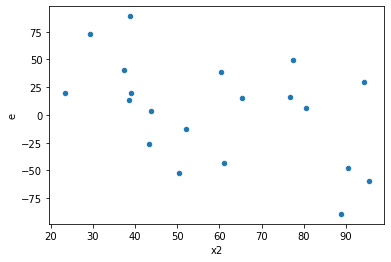

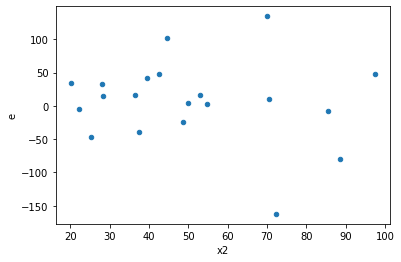

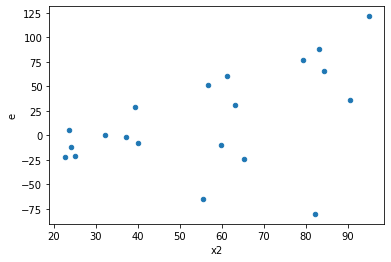

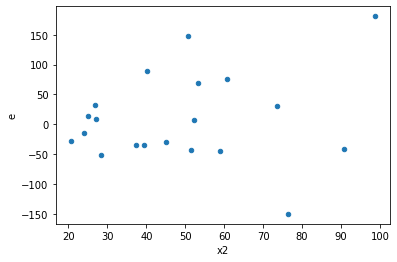

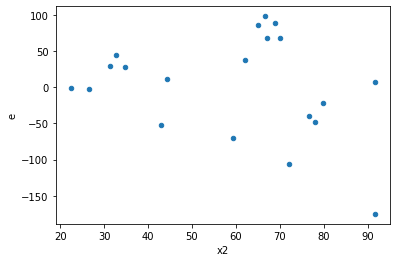

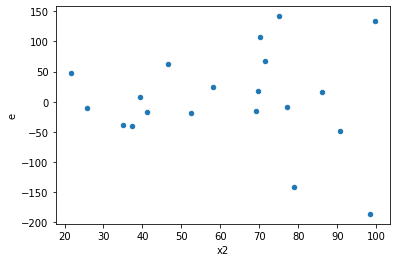

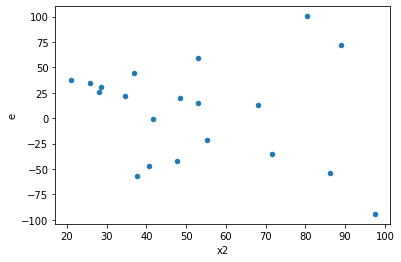

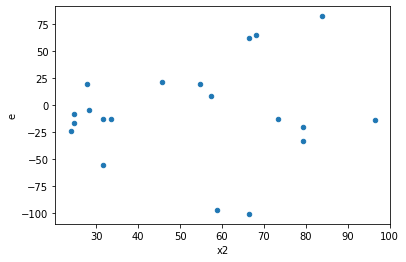

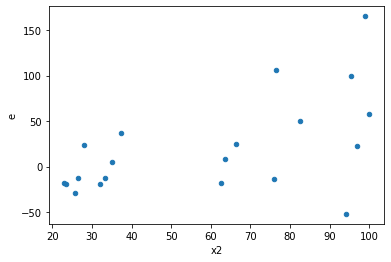

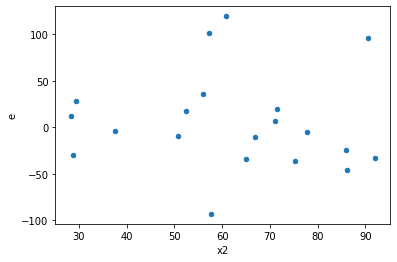

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,9.0,5.0,6752.247673456712,19589.000245177147,750.2497414951902,3917.8000490354293,5.2219945337502605,0.08343845148825224,0.9582807742558739,0.04171922574412612,Reject001=1 : Homoscedasticity
3.0,11.0,3.0,23393.653035325482,32131.741881888847,2126.695730484135,10710.580627296282,5.0362543516547404,0.20961455752151115,0.8951927212392444,0.10480727876075557,Reject001=1 : Homoscedasticity
4.0,5.0,9.0,19585.869805292557,50949.77699567594,3917.1739610585114,5661.086332852882,1.4451965598492658,0.5939560088239619,0.703021995588019,0.29697800441198097,Reject001=1 : Homoscedasticity
5.0,9.0,5.0,28943.306938312096,36651.3426175121,3215.9229931457885,7330.26852350242,2.2793669310881146,0.377505905098086,0.811247047450957,0.188752952549043,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,4616.78065807178,25310.427186459805,769.4634430119632,3163.8033983074756,4.111700727357734,0.06991488974279303,0.9650425551286035,0.034957444871396515,Reject001=1 : Homoscedasticity
10.0,6.0,8.0,9223.77860532459,37559.87009265628,1537.2964342207651,4694.983761582035,3.05405233308946,0.1472206310956965,0.9263896844521518,0.07361031554784825,Reject001=1 : Homoscedasticity
11.0,9.0,5.0,24833.710376807412,139109.11843899064,2759.3011529786013,27821.82368779813,10.082923952597605,0.0203344917177537,0.9898327541411232,0.01016724585887685,Reject001=1 : Homoscedasticity
12.0,10.0,4.0,16435.79000924024,32126.816180056354,1643.579000924024,8031.7040450140885,4.8867161484167445,0.13992072076132533,0.9300396396193373,0.06996036038066267,Reject001=1 : Homoscedasticity
13.0,7.0,7.0,5520.376609280174,17319.922800729822,788.6252298971677,2474.274685818546,3.137453117168439,0.15444245469011375,0.9227787726549431,0.07722122734505688,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,4.0,16203.382607022644,4197.117666693036,1620.3382607022645,1049.279416673259,0.6475681295203725,0.5251907734667247,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,37657.38839657605,20798.02576836269,6276.231399429341,2599.7532210453364,0.41422201566400435,0.2989160565160576,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,6752.247673456712,19589.000245177147,750.2497414951902,3917.8000490354293,5.2219945337502605,0.08343845148825224,Reject001=1 : Homoscedasticity
3.0,11.0,3.0,23393.653035325482,32131.741881888847,2126.695730484135,10710.580627296282,5.0362543516547404,0.20961455752151115,Reject001=1 : Homoscedasticity
4.0,5.0,9.0,19585.869805292557,50949.77699567594,3917.1739610585114,5661.086332852882,1.4451965598492658,0.5939560088239619,Reject001=1 : Homoscedasticity
5.0,9.0,5.0,28943.306938312096,36651.3426175121,3215.9229931457885,7330.26852350242,2.2793669310881146,0.377505905098086,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,4616.78065807178,25310.427186459805,769.4634430119632,3163.8033983074756,4.111700727357734,0.06991488974279303,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,25408.428218343655,2504.9550564368733,3176.053527292957,417.49250940614553,0.13145008603239333,0.011517503425915059,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,20604.034937002652,2364.2164100889945,2575.5043671253316,394.03606834816577,0.15299374886635198,0.01849302234250762,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      866
Reject001=0 : Heteroscedasticity    134
Name: Result_test, dtype: int64